# GRADIENT DESCENT ALGORITHM

It is an algorithm that is used to find the optimal solutions to a wide range of problems. This algorithm tries to minimize the cost function by changing the value of parameters iteratively.

Let us understand this algorithm by a simple example of Linear Regression.

Let the linear equation be $$ f(x) = wx + b \tag{1} $$

Now, here we need to find the best value of $w$ and $b$ so that our model would be working at its best and the model works the best, when $J(w,b)$ is at or near to zero. In simple words, the lesser the $J(w,b)$ value, the better the model .

### ALGORITHM

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{2}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously and $\alpha$ is the learning rate whose value is in between 0 and 1.

The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{3}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{4}\\
\end{align}
$$

Here, cost function: $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{5}$$ 


In [26]:
#importing the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt

Let's take five data points . Here, **x_train** is the input variable while **y_train** is the target variable.

$m$ is the total number of training examples. In this case, we have $m = 5$

Also, representing the datasets in a scatter plot.

In [150]:
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([3, 5, 7, 10, 12])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1 2 3 4 5]
y_train = [ 3  5  7 10 12]


In [148]:
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 5


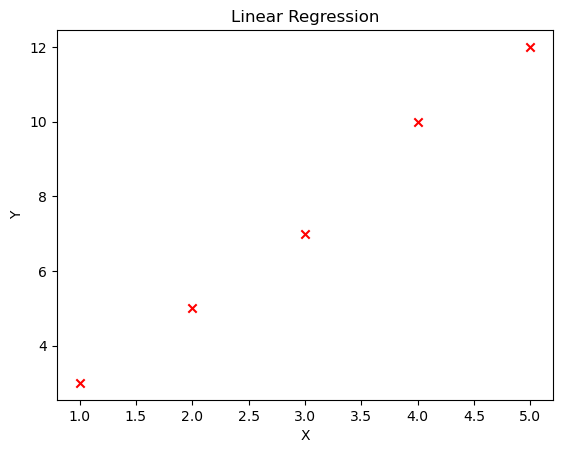

In [89]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Linear Regression")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
plt.show()

The below function computes the output of the model, where  $x , w, b$  are provided as arguments and ultimately returns the $f_{wb}$ by calculating for each training inputs $x[i]$ using $(1)$

In [158]:
def compute_model_output(x, w, b):

    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

The function **compute_cost** computes the cost function for the provided value of $w$ and $b$ by using $(4)$

In [95]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost

    return total_cost
    

The function **compute_gradient** computes the gradient in **Gradient Descent Algorithm** using $(3)$ and $(4)$

In [99]:
def compute_gradient(x, y, w, b):

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    dj_dw = 1/m * dj_dw
    dj_db = 1/m * dj_db

    return dj_dw, dj_db

The following function is where the **Gradient Descent** is implemented with all the required parameters passed as arguments.

In [129]:
def gradient_descent(x, y, w_in, b_in, alpha, itrs, cost_function, gradient_function):

    w = w_in
    b = b_in 

    #To collect the data for graph to see cost vs iterations, but we won't use it here !!
    J_history = [ ]
    parameters_history = [ ]

    for i in range(itrs):

        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = cost_function(x, y, w, b)

        J_history.append(cost)
        parameters_history.append((w,b))

        if i % 40 == 0:
            print(f"Iteration = {i}, w = {w}, b = {b}, cost = {cost}")

    return w, b, J_history, parameters_history

In [131]:
#Initial values of w and b
w_init = 1.5
b_init = 0.2

#No. of iterations
iterations = 3000

#Learning Rate
alpha = 0.095

#gradient_descent function Call
w_final, b_final, J_list, Params_list = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)

Iteration = 0, w = 2.4215, b = 0.4565, cost = 0.09628275000000003
Iteration = 40, w = 2.310386278557933, b = 0.4625022388575216, cost = 0.03012796577033175
Iteration = 80, w = 2.305435158433739, b = 0.48037735348776966, cost = 0.030035042759621433
Iteration = 120, w = 2.302844228280136, b = 0.489731433439962, cost = 0.030009596277181767
Iteration = 160, w = 2.3014883898249052, b = 0.4946264404685572, cost = 0.030002627890518357
Iteration = 200, w = 2.300778877098703, b = 0.4971880065373165, cost = 0.03000071963412966
Iteration = 240, w = 2.300407587800409, b = 0.4985284787136149, cost = 0.03000019706805776
Iteration = 280, w = 2.300213291436247, b = 0.49922995023814243, cost = 0.03000005396606106
Iteration = 320, w = 2.3001116157959847, b = 0.4995970315609952, cost = 0.030000014778324747
Iteration = 360, w = 2.300058408748764, b = 0.4997891258839658, cost = 0.030000004046967222
Iteration = 400, w = 2.300030565404315, b = 0.499889649192073, cost = 0.030000001108240845
Iteration = 440, w

As you can see in the above output, after **Iteration : 1920**, the value of $w , b$ and $cost$ is same . This is how the **Gradient Descent** works i.e. once it reaches it's minimum, the value remains constant and the computations has no effect afterwards. In Linear Regression model, there is only one minimum but in case of other models,there can be various local minimum and a global minimum. So, somewhere the algorithm might get stucked in local minimum and never reach global minimum which may deprived us from getting the best solution.

Now, plotting the data points from the model with the help of value of $w$ and $b$ found from the algorithm :

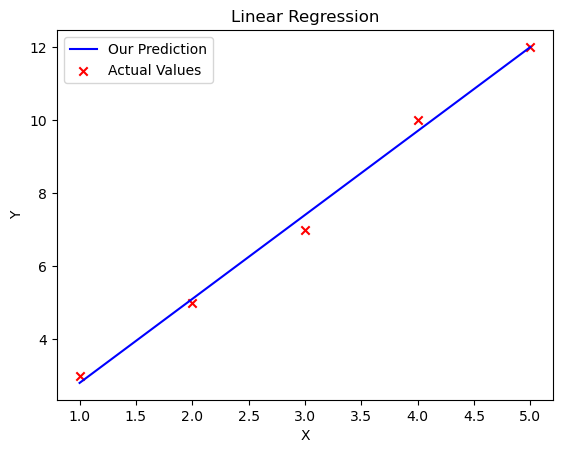

In [133]:
tmp_f_wb = compute_model_output(x_train, w_final, b_final)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Linear Regression")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
plt.legend()
plt.show()

Almost, the model works perfectly .